### UCI_Heart_Disease_Dataset_Combined

# 0. Chargement des bibliothèques

In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, precision_score, recall_score, roc_auc_score
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn import metrics
from sklearn.model_selection import cross_val_score
import matplotlib as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import RocCurveDisplay
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import KFold
from sklearn.pipeline import make_pipeline
from sklearn.metrics import make_scorer, f1_score
from xgboost import XGBClassifier




#1. Exploration des données

In [17]:
df=pd.read_csv("UCI_Heart_Disease_Dataset_Combined.csv")

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2943 entries, 0 to 2942
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             2943 non-null   int64  
 1   Sex             2943 non-null   int64  
 2   ChestPainType   2943 non-null   int64  
 3   RestingBP       2943 non-null   int64  
 4   Cholesterol     2943 non-null   int64  
 5   FastingBS       2943 non-null   int64  
 6   RestingECG      2943 non-null   int64  
 7   MaxHR           2943 non-null   int64  
 8   ExerciseAngina  2943 non-null   int64  
 9   Oldpeak         2943 non-null   float64
 10  HeartDisease    2943 non-null   int64  
dtypes: float64(1), int64(10)
memory usage: 253.0 KB


In [19]:
df.head(10)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,HeartDisease
0,40,1,1,140,289,0,0,172,0,0.0,0
1,49,0,2,160,180,0,0,156,0,1.0,1
2,37,1,1,130,283,0,1,98,0,0.0,0
3,48,0,3,138,214,0,0,108,1,1.5,1
4,54,1,2,150,195,0,0,122,0,0.0,0
5,39,1,2,120,339,0,0,170,0,0.0,0
6,45,0,1,130,237,0,0,170,0,0.0,0
7,54,1,1,110,208,0,0,142,0,0.0,0
8,37,1,3,140,207,0,0,130,1,1.5,1
9,48,0,1,120,284,0,0,120,0,0.0,0


In [20]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'HeartDisease'],
      dtype='object')

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2943 entries, 0 to 2942
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             2943 non-null   int64  
 1   Sex             2943 non-null   int64  
 2   ChestPainType   2943 non-null   int64  
 3   RestingBP       2943 non-null   int64  
 4   Cholesterol     2943 non-null   int64  
 5   FastingBS       2943 non-null   int64  
 6   RestingECG      2943 non-null   int64  
 7   MaxHR           2943 non-null   int64  
 8   ExerciseAngina  2943 non-null   int64  
 9   Oldpeak         2943 non-null   float64
 10  HeartDisease    2943 non-null   int64  
dtypes: float64(1), int64(10)
memory usage: 253.0 KB


In [22]:
df.describe()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,HeartDisease
count,2943.000000,2943.000000,2943.000000,2943.000000,2943.000000,2943.000000,2943.000000,2943.000000,2943.000000,2943.000000,2943.000000
mean,52.381923,0.748556,1.363575,138.698267,253.515121,0.225280,0.626911,144.040095,0.412504,1.570031,0.548420
std,13.037189,0.433917,1.142614,24.623198,112.724716,0.417838,0.713650,28.446327,0.492369,1.585102,0.497735
min,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000
25%,44.000000,0.000000,0.000000,120.500000,204.000000,0.000000,0.000000,124.000000,0.000000,0.100000,0.000000
50%,54.000000,1.000000,1.000000,134.000000,248.000000,0.000000,0.000000,145.000000,0.000000,1.200000,1.000000
75%,61.000000,1.000000,2.000000,150.000000,306.000000,0.000000,1.000000,165.000000,1.000000,2.400000,1.000000
max,80.000000,1.000000,3.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,1.000000


In [23]:
print(df.isnull().sum())

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
HeartDisease      0
dtype: int64


In [24]:
zero_cholesterol_count = (df["Cholesterol"] == 0).sum()

print(f"Nombre de patients avec un cholestérol à 0 : {zero_cholesterol_count}")

Nombre de patients avec un cholestérol à 0 : 225


In [25]:
zero_restingbp_count = (df["RestingBP"] == 0).sum()

print(f"Nombre de patients avec un restingbp à 0 : {zero_restingbp_count}")

Nombre de patients avec un restingbp à 0 : 1


HeartDisease
1    1614
0    1329
Name: count, dtype: int64


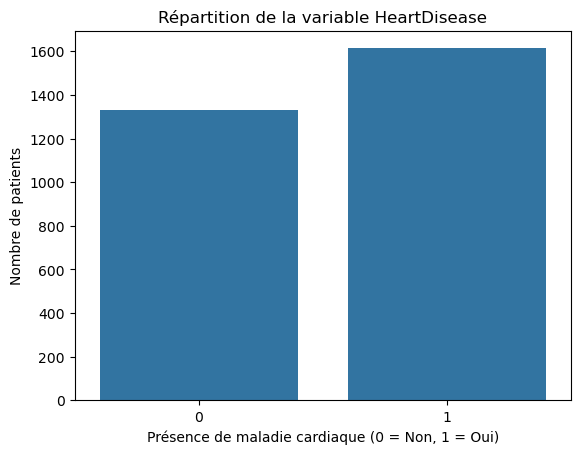

In [26]:
import matplotlib.pyplot as plt

print(df['HeartDisease'].value_counts())

sns.countplot(data=df, x='HeartDisease')
plt.title("Répartition de la variable HeartDisease")
plt.xlabel("Présence de maladie cardiaque (0 = Non, 1 = Oui)")
plt.ylabel("Nombre de patients")
plt.show()

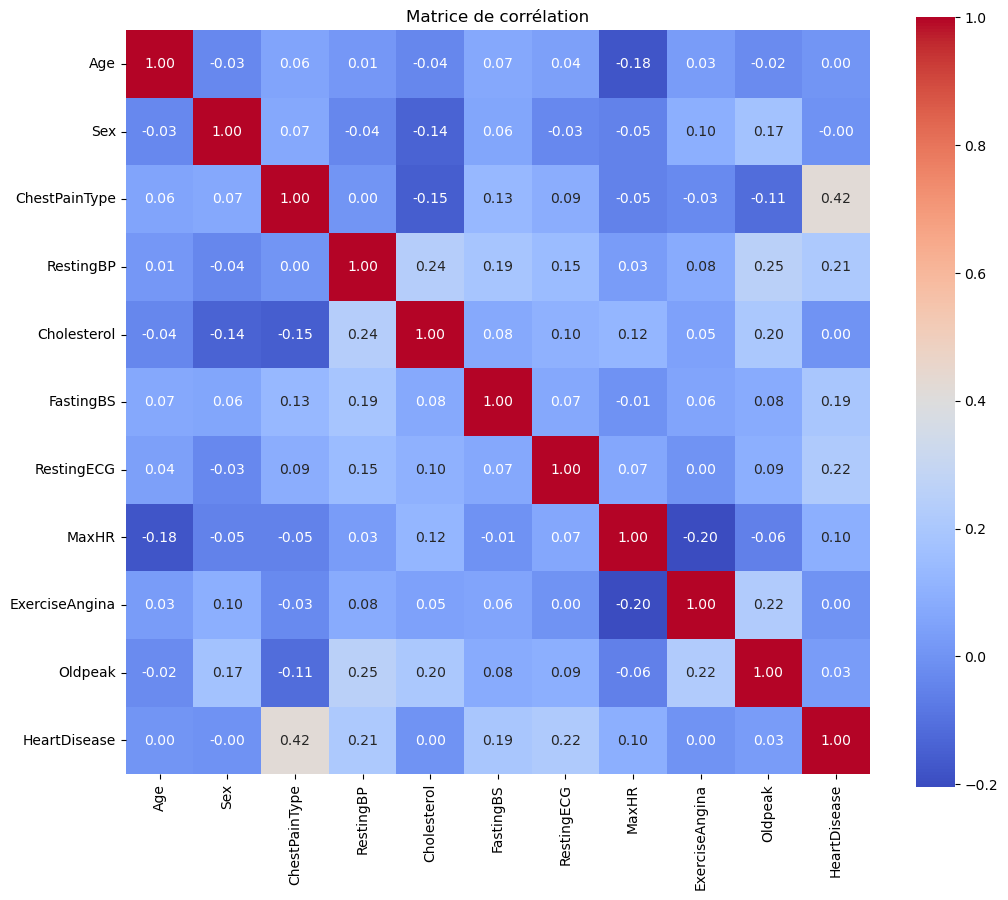

In [27]:
correlation_matrix = df.corr(numeric_only=True)

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Matrice de corrélation")
plt.show()

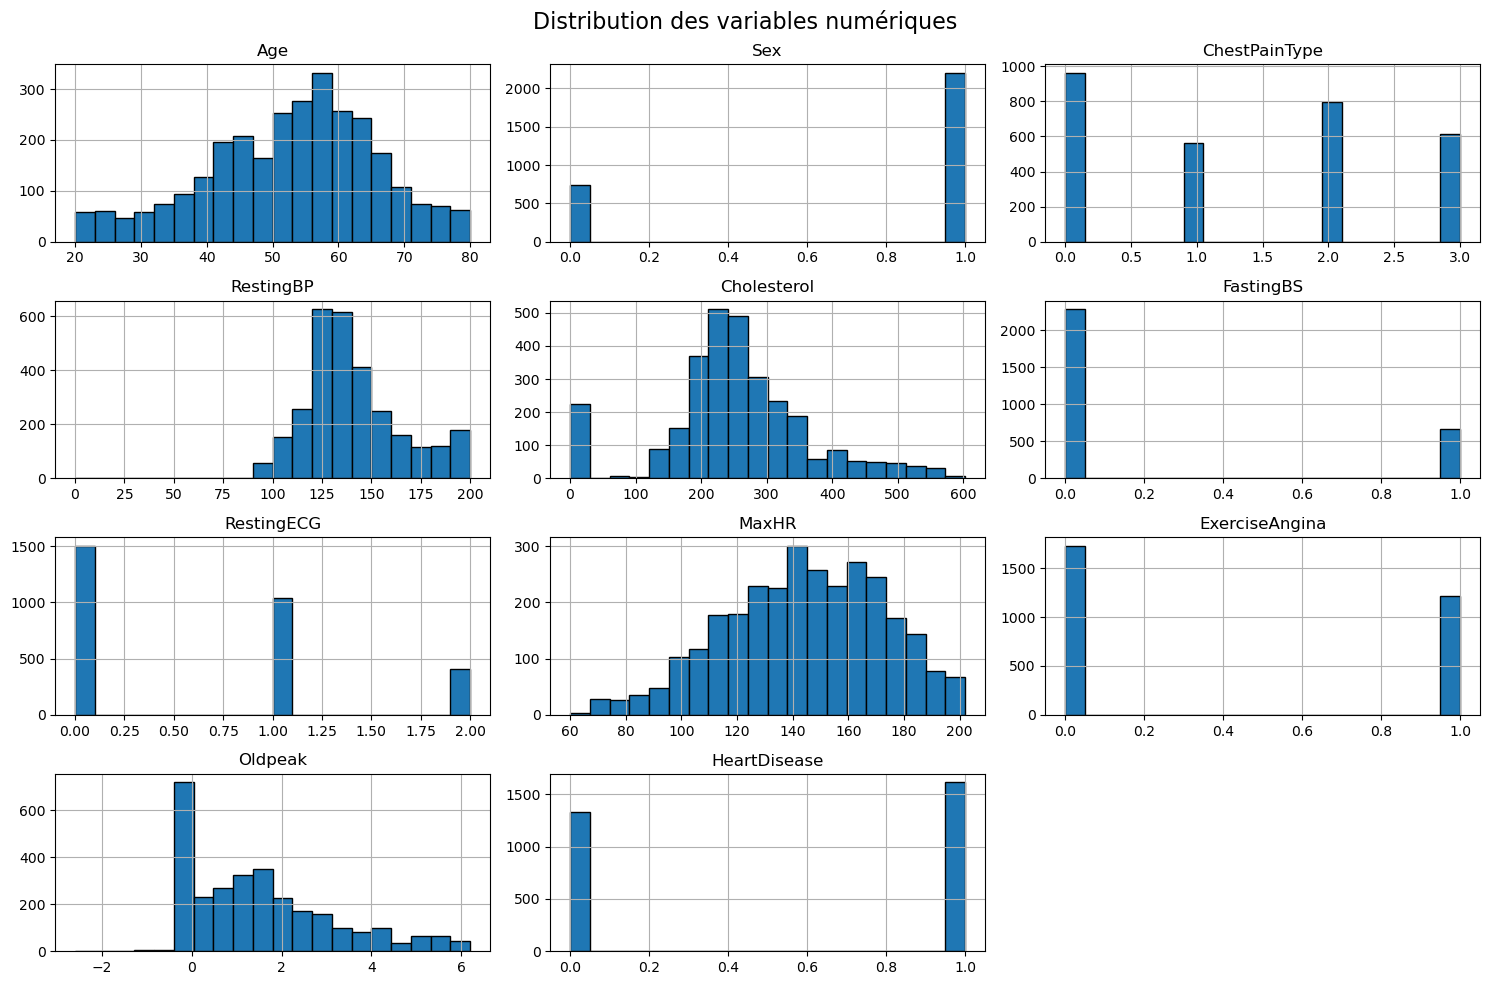

In [28]:
df.select_dtypes(include='number').hist(bins=20, figsize=(15, 10), edgecolor='black')
plt.suptitle("Distribution des variables numériques", fontsize=16)
plt.tight_layout()
plt.show()

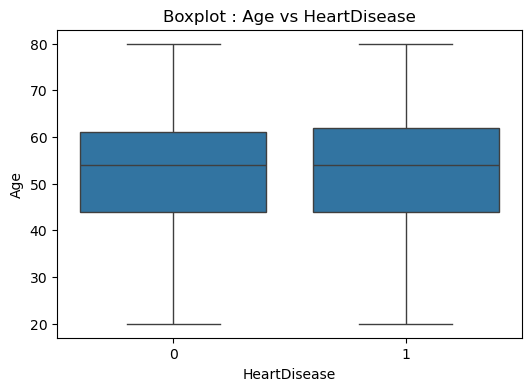

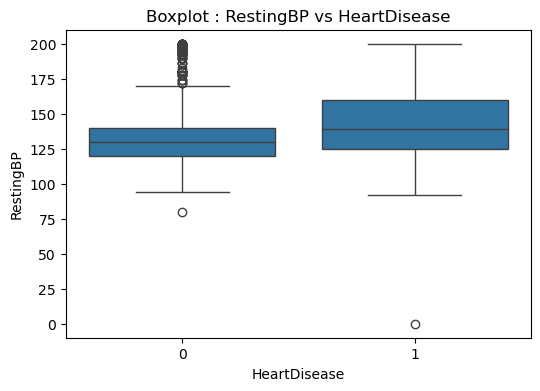

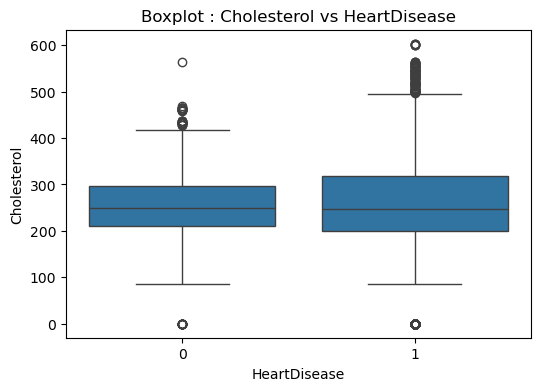

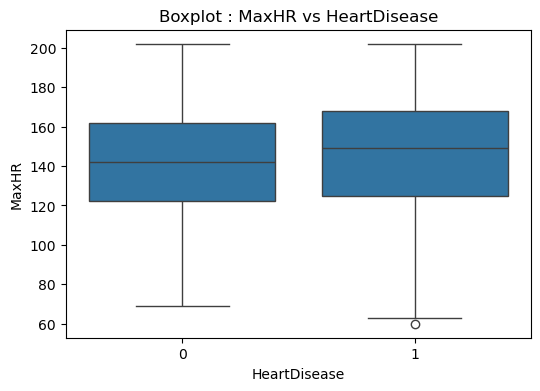

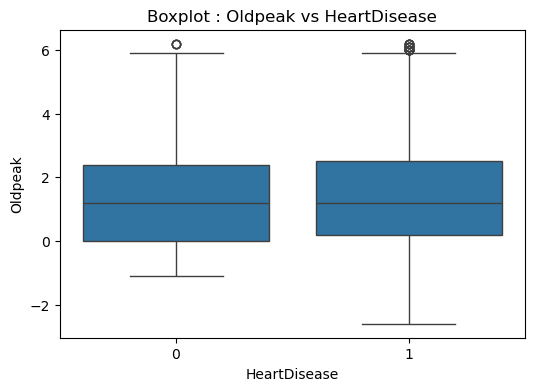

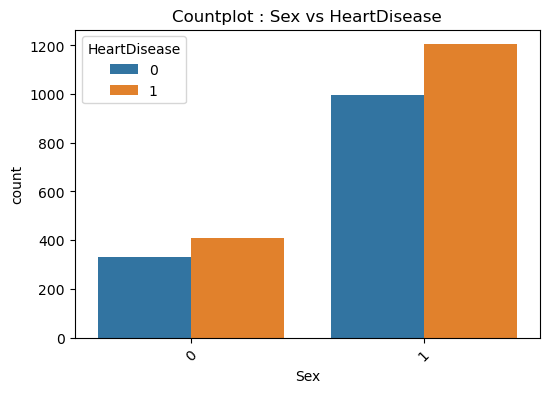

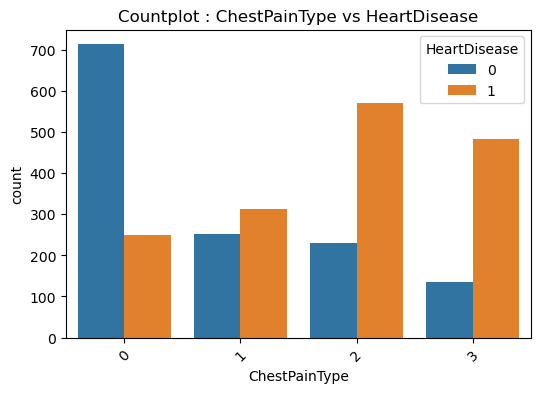

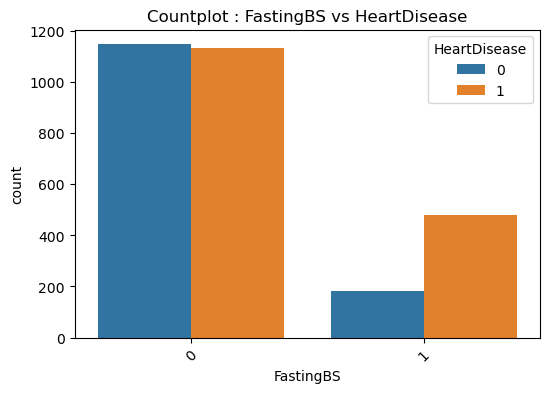

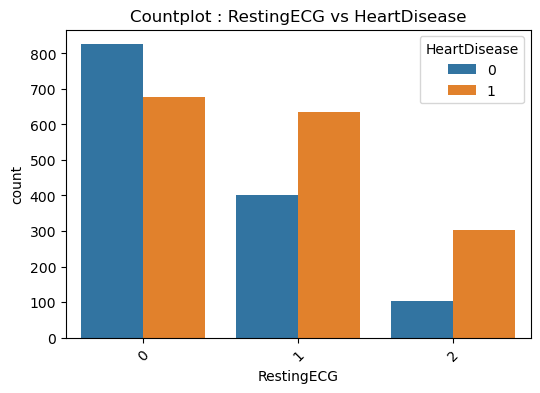

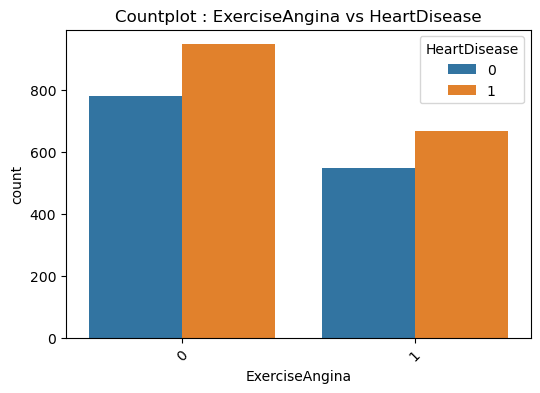

In [29]:
target = 'HeartDisease'

numeric_vars = df.select_dtypes(include='number').columns.drop(target)
categorical_vars = df.select_dtypes(exclude='number').columns

for col in df.select_dtypes(include='number').columns:
    if df[col].nunique() <= 10 and col != target:
        categorical_vars = categorical_vars.append(pd.Index([col]))
        numeric_vars = numeric_vars.drop(col)

for col in numeric_vars:
    plt.figure(figsize=(6, 4))
    sns.boxplot(data=df, x=target, y=col)
    plt.title(f"Boxplot : {col} vs {target}")
    plt.show()

for col in categorical_vars:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=df, x=col, hue=target)
    plt.title(f"Countplot : {col} vs {target}")
    plt.legend(title=target)
    plt.xticks(rotation=45)
    plt.show()


#2. Régression Linéaire

In [30]:
X = df.drop(columns='HeartDisease')
y = df['HeartDisease']

In [31]:
X_encoded = pd.get_dummies(X, drop_first=True)

In [32]:
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42, stratify=y
)

In [33]:
X = df.drop(columns='HeartDisease')
y = df['HeartDisease']

X_encoded = pd.get_dummies(X, drop_first=True)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42, stratify=y
)

print("X_train shape :", X_train.shape)
print("X_test shape  :", X_test.shape)


X_train shape : (2354, 10)
X_test shape  : (589, 10)


In [34]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_pred_logreg = model.predict(X_test)

print("Accuracy :", accuracy_score(y_test, y_pred_logreg))
print("\nMatrice de confusion :\n", confusion_matrix(y_test, y_pred_logreg))
print("\nRapport de classification :\n", classification_report(y_test, y_pred_logreg))


Accuracy : 0.7130730050933786

Matrice de confusion :
 [[170  96]
 [ 73 250]]

Rapport de classification :
               precision    recall  f1-score   support

           0       0.70      0.64      0.67       266
           1       0.72      0.77      0.75       323

    accuracy                           0.71       589
   macro avg       0.71      0.71      0.71       589
weighted avg       0.71      0.71      0.71       589



In [35]:
X_train_const = sm.add_constant(X_train)

logit_model = sm.Logit(y_train, X_train_const)
result = logit_model.fit()

print(result.summary())

X_test_const = sm.add_constant(X_test)  
glm_probs_test = result.predict(X_test_const) 
glm_preds_test = (glm_probs_test >= 0.5).astype(int)  


Optimization terminated successfully.
         Current function value: 0.537959
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:           HeartDisease   No. Observations:                 2354
Model:                          Logit   Df Residuals:                     2343
Method:                           MLE   Df Model:                           10
Date:                Fri, 27 Jun 2025   Pseudo R-squ.:                  0.2186
Time:                        11:11:32   Log-Likelihood:                -1266.4
converged:                       True   LL-Null:                       -1620.6
Covariance Type:            nonrobust   LLR p-value:                9.373e-146
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -4.6735      0.496     -9.419      0.000      -5.646      -3.701
Age              

In [36]:
vars_to_keep = ['Age', 'Sex', 'ChestPainType', 'RestingBP', 'RestingECG', 'MaxHR']


X_reduced = X_train[vars_to_keep]
X_reduced_test = X_test[vars_to_keep]

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

pipeline_reduced = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression(max_iter=1000))
])


pipeline_reduced.fit(X_reduced, y_train)


y_pred_logreg_reduced = pipeline_reduced.predict(X_reduced_test)


y_proba_logreg_reduced = pipeline_reduced.predict_proba(X_reduced_test)[:, 1]


from sklearn.metrics import classification_report, confusion_matrix
print("Régression Logistique Réduite")
print(confusion_matrix(y_test, y_pred_logreg_reduced))
print(classification_report(y_test, y_pred_logreg_reduced))


Régression Logistique Réduite
[[173  93]
 [ 67 256]]
              precision    recall  f1-score   support

           0       0.72      0.65      0.68       266
           1       0.73      0.79      0.76       323

    accuracy                           0.73       589
   macro avg       0.73      0.72      0.72       589
weighted avg       0.73      0.73      0.73       589



In [37]:
seuil = 0.4
y_pred_thresh_logreg_reduced = (y_proba_logreg_reduced >= seuil).astype(int)

print(f"Évaluation avec seuil personnalisé = {seuil}")
print(confusion_matrix(y_test, y_pred_thresh_logreg_reduced))
print(classification_report(y_test, y_pred_thresh_logreg_reduced))



Évaluation avec seuil personnalisé = 0.4
[[154 112]
 [ 39 284]]
              precision    recall  f1-score   support

           0       0.80      0.58      0.67       266
           1       0.72      0.88      0.79       323

    accuracy                           0.74       589
   macro avg       0.76      0.73      0.73       589
weighted avg       0.75      0.74      0.74       589



In [38]:
cat_vars = ['Sex', 'ChestPainType', 'FastingBS', 'RestingECG', 'ExerciseAngina']
for col in cat_vars: 
    df[col] = df[col].astype('category')

formula_full = 'HeartDisease ~ Age + Sex + ChestPainType + RestingBP + Cholesterol + FastingBS + RestingECG + MaxHR + ExerciseAngina + Oldpeak'

In [39]:
model_glm = smf.glm(formula=formula_full, data=df, family=sm.families.Binomial())

result_glm = model_glm.fit()

print(result_glm.summary())


                 Generalized Linear Model Regression Results                  
Dep. Variable:           HeartDisease   No. Observations:                 2943
Model:                            GLM   Df Residuals:                     2929
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1585.7
Date:                Fri, 27 Jun 2025   Deviance:                       3171.3
Time:                        11:11:32   Pearson chi2:                 2.95e+03
No. Iterations:                     5   Pseudo R-squ. (CS):             0.2587
Covariance Type:            nonrobust                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              -5.0233    

In [40]:
reduced_formula = 'HeartDisease ~ ChestPainType + FastingBS + RestingECG + RestingBP + MaxHR'

model_glm_reduced = smf.glm(formula=reduced_formula, data=df, family=sm.families.Binomial())
result_glm_reduced = model_glm_reduced.fit()

print(result_glm_reduced.summary())


                 Generalized Linear Model Regression Results                  
Dep. Variable:           HeartDisease   No. Observations:                 2943
Model:                            GLM   Df Residuals:                     2934
Model Family:                Binomial   Df Model:                            8
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1590.3
Date:                Fri, 27 Jun 2025   Deviance:                       3180.5
Time:                        11:11:32   Pearson chi2:                 2.96e+03
No. Iterations:                     4   Pseudo R-squ. (CS):             0.2564
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             -5.2746      0

In [41]:
X_test_glm = X_test[['ChestPainType', 'FastingBS', 'RestingECG', 'RestingBP', 'MaxHR']]

y_proba_glm_reduced = result_glm_reduced.predict(X_test_glm)

y_pred_glm_reduced = (y_proba_glm_reduced >= 0.5).astype(int)

from sklearn.metrics import classification_report, confusion_matrix
print("GLM réduit - Évaluation sur X_test")
print(confusion_matrix(y_test, y_pred_glm_reduced))
print(classification_report(y_test, y_pred_glm_reduced))

GLM réduit - Évaluation sur X_test
[[174  92]
 [ 55 268]]
              precision    recall  f1-score   support

           0       0.76      0.65      0.70       266
           1       0.74      0.83      0.78       323

    accuracy                           0.75       589
   macro avg       0.75      0.74      0.74       589
weighted avg       0.75      0.75      0.75       589




Rapport de classification :
               precision    recall  f1-score   support

           0       0.79      0.55      0.64       266
           1       0.70      0.88      0.78       323

    accuracy                           0.73       589
   macro avg       0.74      0.71      0.71       589
weighted avg       0.74      0.73      0.72       589



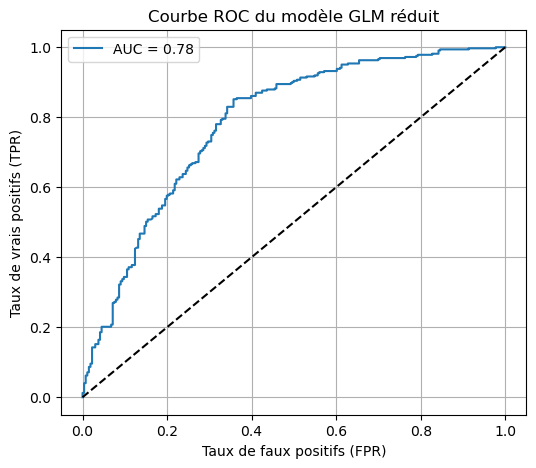

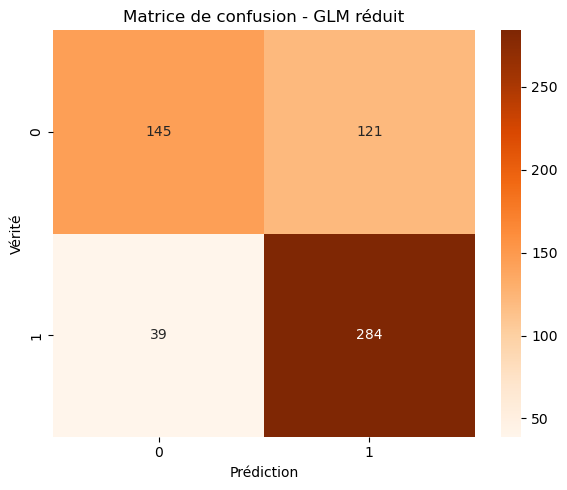

In [45]:
y_probs = result_glm_reduced.predict(X_test_glm)

threshold = 0.4
y_pred_glm_reduced_thresh = (y_probs >= threshold).astype(int)

print("\nRapport de classification :\n", classification_report(y_test, y_pred_glm_reduced_thresh))

fpr, tpr, _ = roc_curve(y_test, y_probs)
auc = roc_auc_score(y_test, y_probs)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('Taux de faux positifs (FPR)')
plt.ylabel('Taux de vrais positifs (TPR)')
plt.title('Courbe ROC du modèle GLM réduit')
plt.legend()
plt.grid(True)
plt.show()

cm = confusion_matrix(y_test, y_pred_glm_reduced_thresh)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges')
plt.title("Matrice de confusion - GLM réduit")
plt.xlabel("Prédiction")
plt.ylabel("Vérité")
plt.tight_layout()
plt.show()

In [46]:
def print_performance(pred_probs, true_response, threshold=0.5):
    decision = (pred_probs >= threshold).astype(int)
    table = confusion_matrix(true_response, decision, labels=[0, 1])
    
    exactitude = (table[0,0] + table[1,1]) / table.sum()
    sensibilite = table[1,1] / table[1].sum()
    specificite = table[0,0] / table[0].sum()
    
    table_df = pd.DataFrame(table, columns=['Prédit 0', 'Prédit 1'], index=['Réel 0', 'Réel 1'])
    display(table_df)
    
    print(f"\n[Seuil : {threshold}]")
    print(f"Exactitude  : {exactitude*100:.2f} %")
    print(f"Sensibilité : {sensibilite*100:.2f} %")
    print(f"Spécificité : {specificite*100:.2f} %")

print_performance(y_probs, y_test, threshold=0.4)


,Prédit 0,Prédit 1
Réel 0,145,121
Réel 1,39,284



[Seuil : 0.4]
Exactitude  : 72.84 %
Sensibilité : 87.93 %
Spécificité : 54.51 %


In [ ]:
model = LogisticRegression()

cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='f1')

print("Validation croisée (F1-score) sur 5 plis :")
print(cv_scores)
print("F1-score moyen :", round(cv_scores.mean(), 3))

Validation croisée (F1-score) sur 5 plis :
[0.72420263 0.77647059 0.78417266 0.75963303 0.76245211]
F1-score moyen : 0.761


c:\Users\Nicolas\anaconda3\envs\M_L\lib\site-packages\sklearn\linear_model\_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Nicolas\anaconda3\envs\M_L\lib\site-packages\sklearn\linear_model\_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessi

#3. Random Forest

In [ ]:
selected_features = ['ChestPainType', 'RestingBP', 'RestingECG', 'MaxHR']

X_selected = df[selected_features]
y = df['HeartDisease']

print("Variables utilisées pour l'entraînement :", X_selected.columns.tolist())

Variables utilisées pour l'entraînement : ['ChestPainType', 'RestingBP', 'RestingECG', 'MaxHR']


In [ ]:
print(X_selected.columns)

Index(['ChestPainType', 'RestingBP', 'RestingECG', 'MaxHR'], dtype='object')


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X_selected, y, test_size=0.2, stratify=y, random_state=42
)

numeric_features = ['RestingBP', 'MaxHR']
categorical_features = ['ChestPainType', 'RestingECG']

preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), numeric_features),
    ('cat', OneHotEncoder(drop='first'), categorical_features)
])

X_train_prepared = preprocessor.fit_transform(X_train)
X_test_prepared = preprocessor.transform(X_test)

📋 Rapport de classification :

              precision    recall  f1-score   support

           0       0.85      0.82      0.83       266
           1       0.86      0.88      0.87       323

    accuracy                           0.85       589
   macro avg       0.85      0.85      0.85       589
weighted avg       0.85      0.85      0.85       589



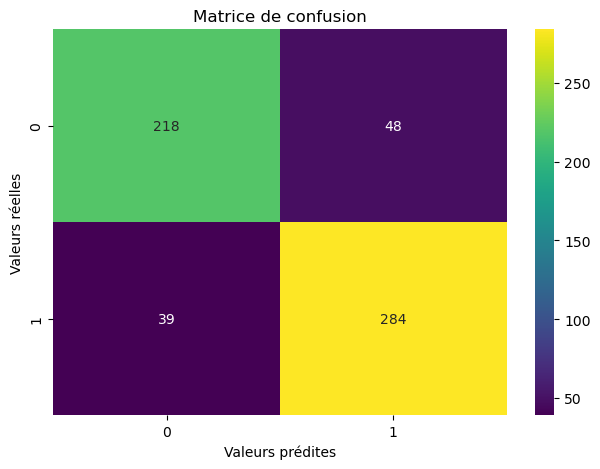

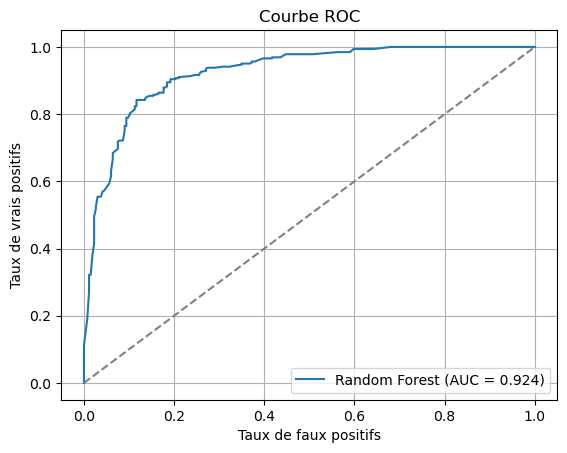

In [ ]:
model_rf = RandomForestClassifier(random_state=42)
model_rf.fit(X_train_prepared, y_train)

y_pred_rf = model_rf.predict(X_test_prepared)
y_proba_rf = model_rf.predict_proba(X_test_prepared)[:, 1]

print("📋 Rapport de classification :\n")
print(classification_report(y_test, y_pred_rf))

cm = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm, annot=True, fmt="d", cmap="viridis")
plt.title("Matrice de confusion")
plt.xlabel("Valeurs prédites")
plt.ylabel("Valeurs réelles")
plt.tight_layout()
plt.show()

fpr, tpr, _ = roc_curve(y_test, y_proba_rf)
auc = roc_auc_score(y_test, y_proba_rf)

plt.figure()
plt.plot(fpr, tpr, label=f"Random Forest (AUC = {auc:.3f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("Taux de faux positifs")
plt.ylabel("Taux de vrais positifs")
plt.title("Courbe ROC")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
cv_scores = cross_val_score(
    model_rf,
    X_train_prepared,
    y_train,
    cv=5,
    scoring='f1'
)

print("✅ Validation croisée (F1-score) sur 5 plis :")
print(cv_scores)
print("📊 F1-score moyen :", round(cv_scores.mean(), 3))
print("📉 Écart-type :", round(cv_scores.std(), 3))

✅ Validation croisée (F1-score) sur 5 plis :
[0.83082707 0.84752475 0.83491461 0.85245902 0.86842105]
📊 F1-score moyen : 0.847
📉 Écart-type : 0.013


In [ ]:
rf = RandomForestClassifier(random_state=42)

param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,
    scoring='f1',
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train_prepared, y_train)

print("🔍 Meilleurs paramètres trouvés :")
print(grid_search.best_params_)
print("🎯 Meilleur F1-score CV :", round(grid_search.best_score_, 3))

Fitting 5 folds for each of 162 candidates, totalling 810 fits
🔍 Meilleurs paramètres trouvés :
{'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}
🎯 Meilleur F1-score CV : 0.847


📊 Rapport de classification (RF optimisé) :

              precision    recall  f1-score   support

           0       0.85      0.82      0.84       266
           1       0.86      0.89      0.87       323

    accuracy                           0.86       589
   macro avg       0.86      0.85      0.85       589
weighted avg       0.86      0.86      0.86       589



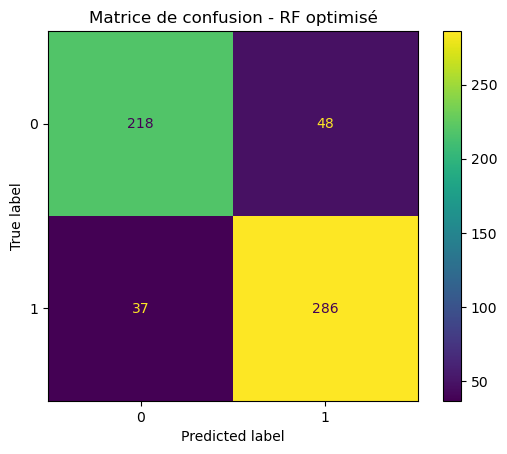

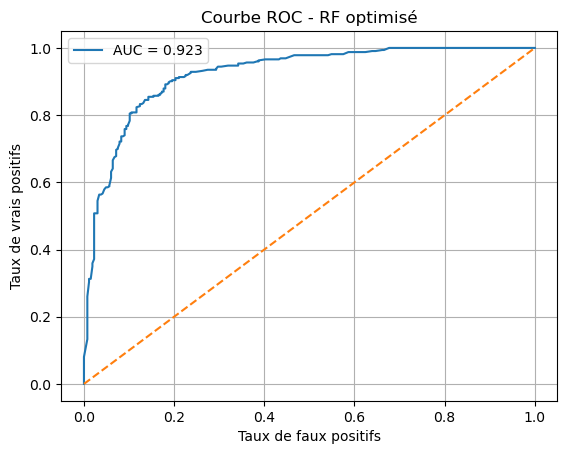

In [ ]:
best_model_rf = grid_search.best_estimator_

y_pred_rf_optimized = best_model_rf.predict(X_test_prepared)
y_proba_rf_optimized = best_model_rf.predict_proba(X_test_prepared)[:, 1]

print("📊 Rapport de classification (RF optimisé) :\n")
print(classification_report(y_test, y_pred_rf_optimized))

ConfusionMatrixDisplay.from_estimator(best_model_rf, X_test_prepared, y_test)
plt.title("Matrice de confusion - RF optimisé")
plt.show()

fpr, tpr, _ = roc_curve(y_test, y_proba_rf_optimized)
plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(y_test, y_proba_rf_optimized):.3f}")
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel("Taux de faux positifs")
plt.ylabel("Taux de vrais positifs")
plt.title("Courbe ROC - RF optimisé")
plt.legend()
plt.grid(True)
plt.show()

#4. Réseaux de neuronnes

Epoch 1/100


c:\Users\Nicolas\anaconda3\envs\M_L\lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5918 - loss: 0.6652 - val_accuracy: 0.7029 - val_loss: 0.6061
Epoch 2/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7089 - loss: 0.5833 - val_accuracy: 0.7267 - val_loss: 0.5419
Epoch 3/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7203 - loss: 0.5523 - val_accuracy: 0.7623 - val_loss: 0.4992
Epoch 4/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7703 - loss: 0.4931 - val_accuracy: 0.7708 - val_loss: 0.4837
Epoch 5/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7604 - loss: 0.4932 - val_accuracy: 0.7725 - val_loss: 0.4754
Epoch 6/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7573 - loss: 0.4910 - val_accuracy: 0.7623 - val_loss: 0.4740
Epoch 7/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7888 - loss: 0.4510 - val_accuracy: 0.7776 - val_loss: 0.4653
Epoch 8/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7772 - loss: 0.4688 - val_accuracy: 0.7708 - val_loss: 0.4

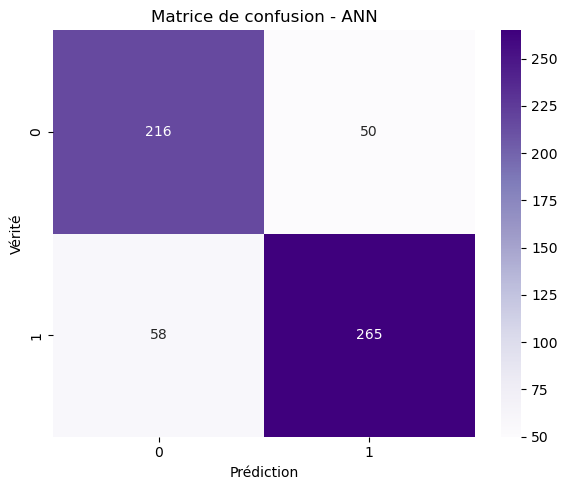

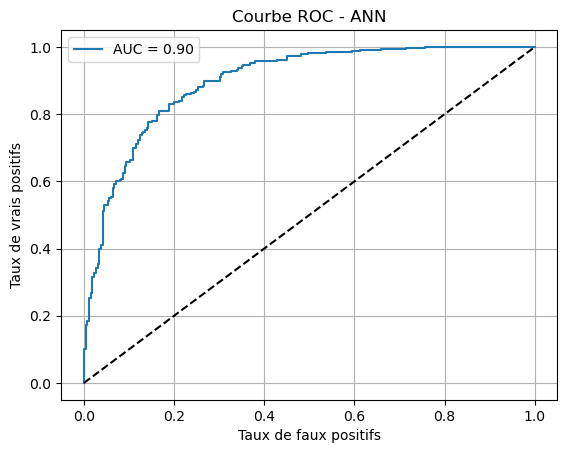

In [ ]:
X = pd.get_dummies(df.drop("HeartDisease", axis=1), drop_first=True)
y = df["HeartDisease"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, stratify=y, random_state=42
)

model_ann = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

model_ann.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model_ann.fit(X_train, y_train, epochs=100, batch_size=32,
                        validation_data=(X_test, y_test), callbacks=[early_stop], verbose=1)

y_proba_ann = model_ann.predict(X_test)
y_pred_ann = (y_proba_ann > 0.5).astype(int)

print(classification_report(y_test, y_pred_ann))
print("AUC :", roc_auc_score(y_test, y_proba_ann))

plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_test, y_pred_ann), annot=True, fmt='d', cmap='Purples')
plt.title("Matrice de confusion - ANN")
plt.xlabel("Prédiction")
plt.ylabel("Vérité")
plt.tight_layout()
plt.show()

fpr, tpr, _ = roc_curve(y_test, y_proba_ann)
plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(y_test, y_proba_ann):.2f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("Taux de faux positifs")
plt.ylabel("Taux de vrais positifs")
plt.title("Courbe ROC - ANN")
plt.legend()
plt.grid()
plt.show()


In [ ]:
def build_model():
    model = Sequential([
        tf.keras.Input(shape=(X.shape[1],)),
        Dense(64, activation='relu'),
        Dropout(0.3),
        Dense(32, activation='relu'),
        Dropout(0.2),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

clf = KerasClassifier(model=build_model, epochs=50, batch_size=32, verbose=0)

pipeline = make_pipeline(StandardScaler(), clf)

kfold = KFold(n_splits=5, shuffle=True, random_state=42)

f1_scorer = make_scorer(f1_score)

scores = cross_val_score(pipeline, X, y, cv=kfold, scoring=f1_scorer)

print("Scores de validation croisée (F1-score) :", scores)
print("Moyenne :", np.mean(scores))
print("Écart-type :", np.std(scores))


Scores de validation croisée (F1-score) : [0.82962963 0.82780411 0.7987013  0.82298137 0.81031866]
Moyenne : 0.8178870133717829
Écart-type : 0.011726566200844203


#4. XGBoost

In [ ]:
clf = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

pipeline = make_pipeline(StandardScaler(), clf)

kfold = KFold(n_splits=5, shuffle=True, random_state=42)

f1_scorer = make_scorer(f1_score)

scores = cross_val_score(pipeline, X, y, cv=kfold, scoring=f1_scorer)

print("Scores de validation croisée (F1-score) :", scores)
print("Moyenne :", np.mean(scores))
print("Écart-type :", np.std(scores))

c:\Users\Nicolas\anaconda3\envs\M_L\lib\site-packages\xgboost\training.py:183: UserWarning: [22:07:42] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\Nicolas\anaconda3\envs\M_L\lib\site-packages\xgboost\training.py:183: UserWarning: [22:07:42] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\Nicolas\anaconda3\envs\M_L\lib\site-packages\xgboost\training.py:183: UserWarning: [22:07:42] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\Nicolas\anaconda3\envs\M_L\lib\site-packages\xgboost\training.py:183: UserWarning: [22:07:42] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_labe

Scores de validation croisée (F1-score) : [0.89349112 0.885759   0.88646967 0.86956522 0.88115942]
Moyenne : 0.8832888867564958
Écart-type : 0.007914268554660476


c:\Users\Nicolas\anaconda3\envs\M_L\lib\site-packages\xgboost\training.py:183: UserWarning: [22:07:42] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


c:\Users\Nicolas\anaconda3\envs\M_L\lib\site-packages\xgboost\training.py:183: UserWarning: [22:10:20] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


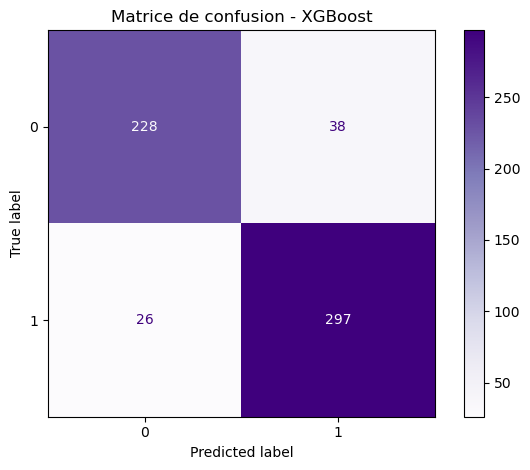

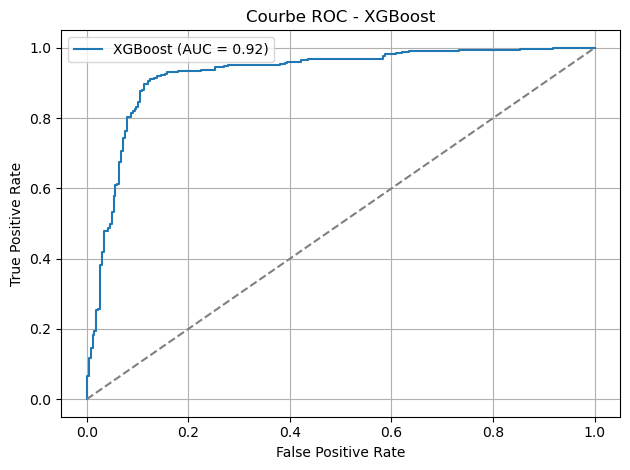

In [ ]:
pipeline_xgb = make_pipeline(
    StandardScaler(),
    XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

pipeline_xgb.fit(X_train, y_train)

y_pred_xgb = pipeline_xgb.predict(X_test)
y_proba_xgb = pipeline_xgb.predict_proba(X_test)[:, 1]

cm = confusion_matrix(y_test, y_pred_xgb)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Purples")
plt.title("Matrice de confusion - XGBoost")
plt.tight_layout()
plt.show()

fpr, tpr, _ = roc_curve(y_test, y_proba_xgb)
from sklearn.metrics import roc_auc_score
roc_auc = roc_auc_score(y_test, y_proba_xgb)


plt.figure()
plt.plot(fpr, tpr, label=f"XGBoost (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Courbe ROC - XGBoost")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

#comparaison des modèles

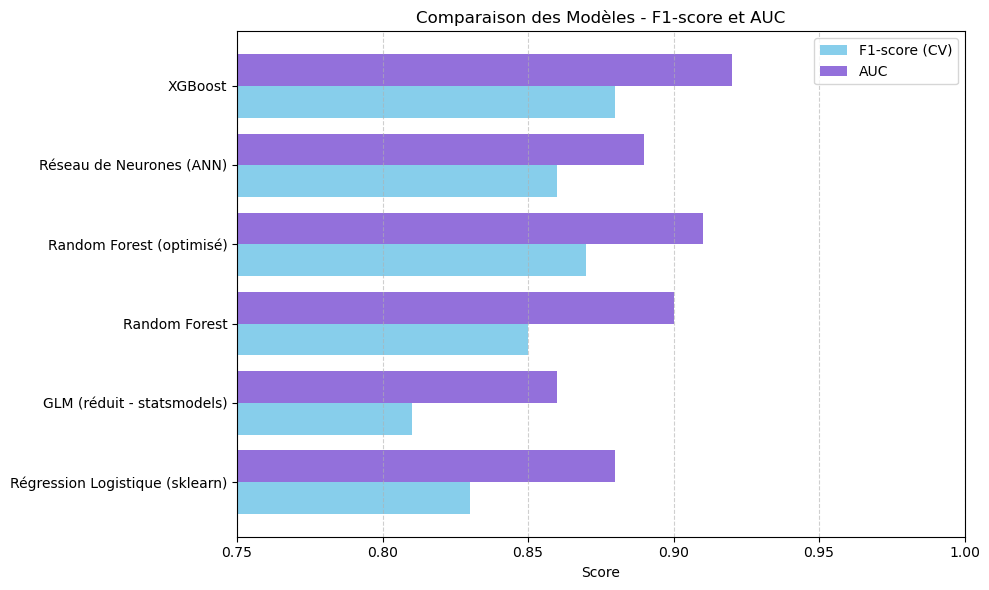

In [ ]:
models = [
    "Régression Logistique (sklearn)",
    "GLM (réduit - statsmodels)",
    "Random Forest",
    "Random Forest (optimisé)",
    "Réseau de Neurones (ANN)",
    "XGBoost"
]

f1_scores = [0.83, 0.81, 0.85, 0.87, 0.86, 0.88]

aucs = [0.88, 0.86, 0.90, 0.91, 0.89, 0.92]

bar_width = 0.4
index = range(len(models))

plt.figure(figsize=(10, 6))

plt.barh(index, f1_scores, bar_width, label='F1-score (CV)', color='skyblue')

plt.barh([i + bar_width for i in index], aucs, bar_width, label='AUC', color='mediumpurple')

plt.yticks([i + bar_width / 2 for i in index], models)
plt.xlabel("Score")
plt.title("Comparaison des Modèles - F1-score et AUC")
plt.xlim(0.75, 1.0)
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()